In [5]:
#Importing, Understanding, and Inspecting Data : #Importing libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplt 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [6]:
 #Reading data file
cvd_data = pd.read_excel("data.xlsx")

In [7]:
 #Checking head of the data
cvd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preliminary analysis:


1. Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [8]:
cvd_data.shape

(303, 14)

In [9]:
cvd_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
cvd_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
cvd_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
cvd_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
cvd_data.duplicated().sum()

1

2. Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.


In [14]:
cvd_data.drop_duplicates(inplace=True)

In [15]:
cvd_data.duplicated().sum()

0

3. Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [16]:
 cvd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Performing EDA:

1. Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.
2. Study the occurrence of CVD across different ages.
3. Can we detect heart attack based on anomalies in resting blood pressure of the patient?
4. Study the composition of overall patients w.r.t . gender.

In [17]:
#Checking data head
cvd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
cvd_data.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [19]:
 #Count plot for multiple columns using loop
cat=['sex','cp','fbs','restecg','exang','slope','ca','thal']

In [20]:
enumerate(cat)

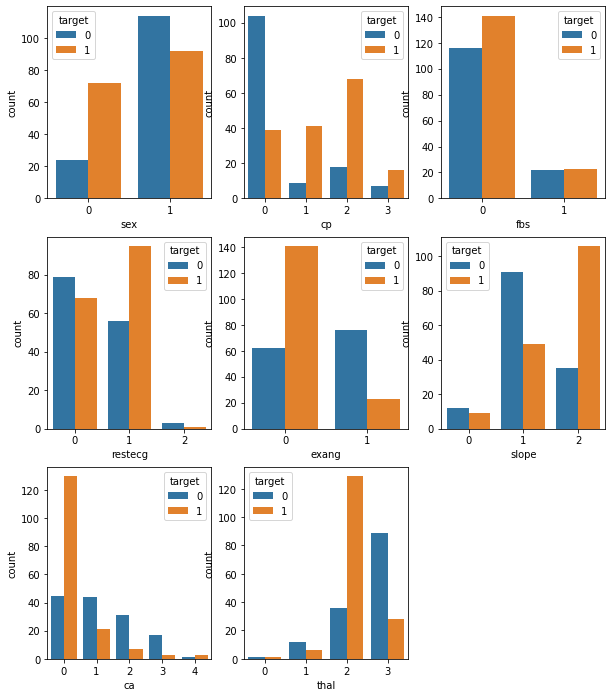

In [23]:
mplt.figure(figsize =(10,12))
for i in enumerate(cat):
    mplt.subplot(3,3,i[0]+1)
    sb.countplot(i[1], hue= 'target',data=cvd_data)

In [24]:
#grouping and cutting to segment and sort data values into bin
cvd_data.groupby([pd.cut(cvd_data['age'],5)])['target'].mean()

age
(28.952, 38.6]    0.727273
(38.6, 48.2]      0.704225
(48.2, 57.8]      0.577320
(57.8, 67.4]      0.377358
(67.4, 77.0]      0.588235
Name: target, dtype: float64

In [26]:
cvd_data.groupby([pd.cut(cvd_data['trestbps'],5)])['target'].mean() 
 

trestbps
(93.894, 115.2]    0.615385
(115.2, 136.4]     0.560284
(136.4, 157.6]     0.530120
(157.6, 178.8]     0.380952
(178.8, 200.0]     0.200000
Name: target, dtype: float64

# Insight
People having higher resting blood pressure have lower chance of heart disease as per the data

In [27]:
#Checking composition for both genders
cvd_data.sex.value_counts(normalize=True)*100

1    68.211921
0    31.788079
Name: sex, dtype: float64

# Performing EDA and Modeling:

1. Describe the relationship between cholesterol levels and our target variable.
2. What can be concluded about the relationship between peak exercising and occurrence of heart attack?
3. Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?
4. Use a pair plot to understand the relationship between all the given variables.
5. Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [29]:
# Using correlation
cvd_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [30]:
sb.set(style="white")

Text(0.5, 1.0, 'Correlation between variables')

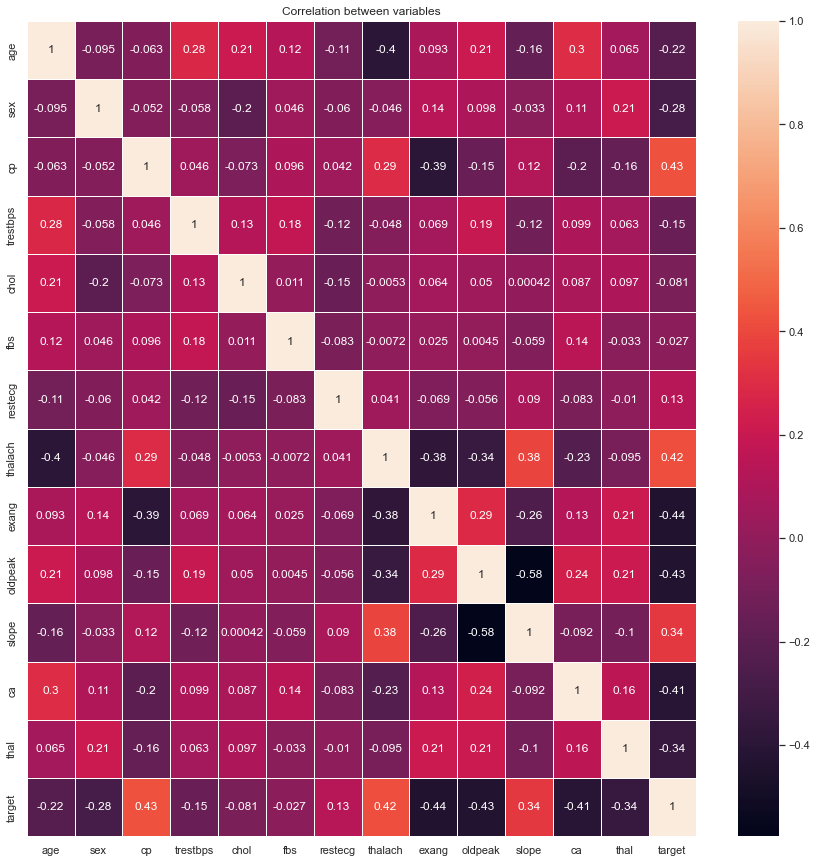

In [32]:
mplt.rcParams['figure.figsize']=(15,15) 
sb.heatmap(cvd_data.corr(),annot= True, linewidth=0.5)
mplt.title("Correlation between variables")

In [33]:
cvd_data.groupby([pd.cut(cvd_data['chol'],5)])['target'].mean()

chol
(125.562, 213.6]    0.607143
(213.6, 301.2]      0.514286
(301.2, 388.8]      0.526316
(388.8, 476.4]      0.500000
(476.4, 564.0]      1.000000
Name: target, dtype: float64

# Insight
Showing positive correlation for cholesterol levels and our target variable.

In [34]:
cvd_data.groupby(['slope'])['target'].mean()

slope
0    0.428571
1    0.350000
2    0.751773
Name: target, dtype: float64

# Insight
When slope is higher chances of Cardiovascular diseases(CVD) is also higher

In [35]:
cvd_data.groupby([pd.cut(cvd_data['thalach'],5)])['target'].mean()

thalach
(70.869, 97.2]    0.142857
(97.2, 123.4]     0.297297
(123.4, 149.6]    0.352273
(149.6, 175.8]    0.676259
(175.8, 202.0]    0.870968
Name: target, dtype: float64

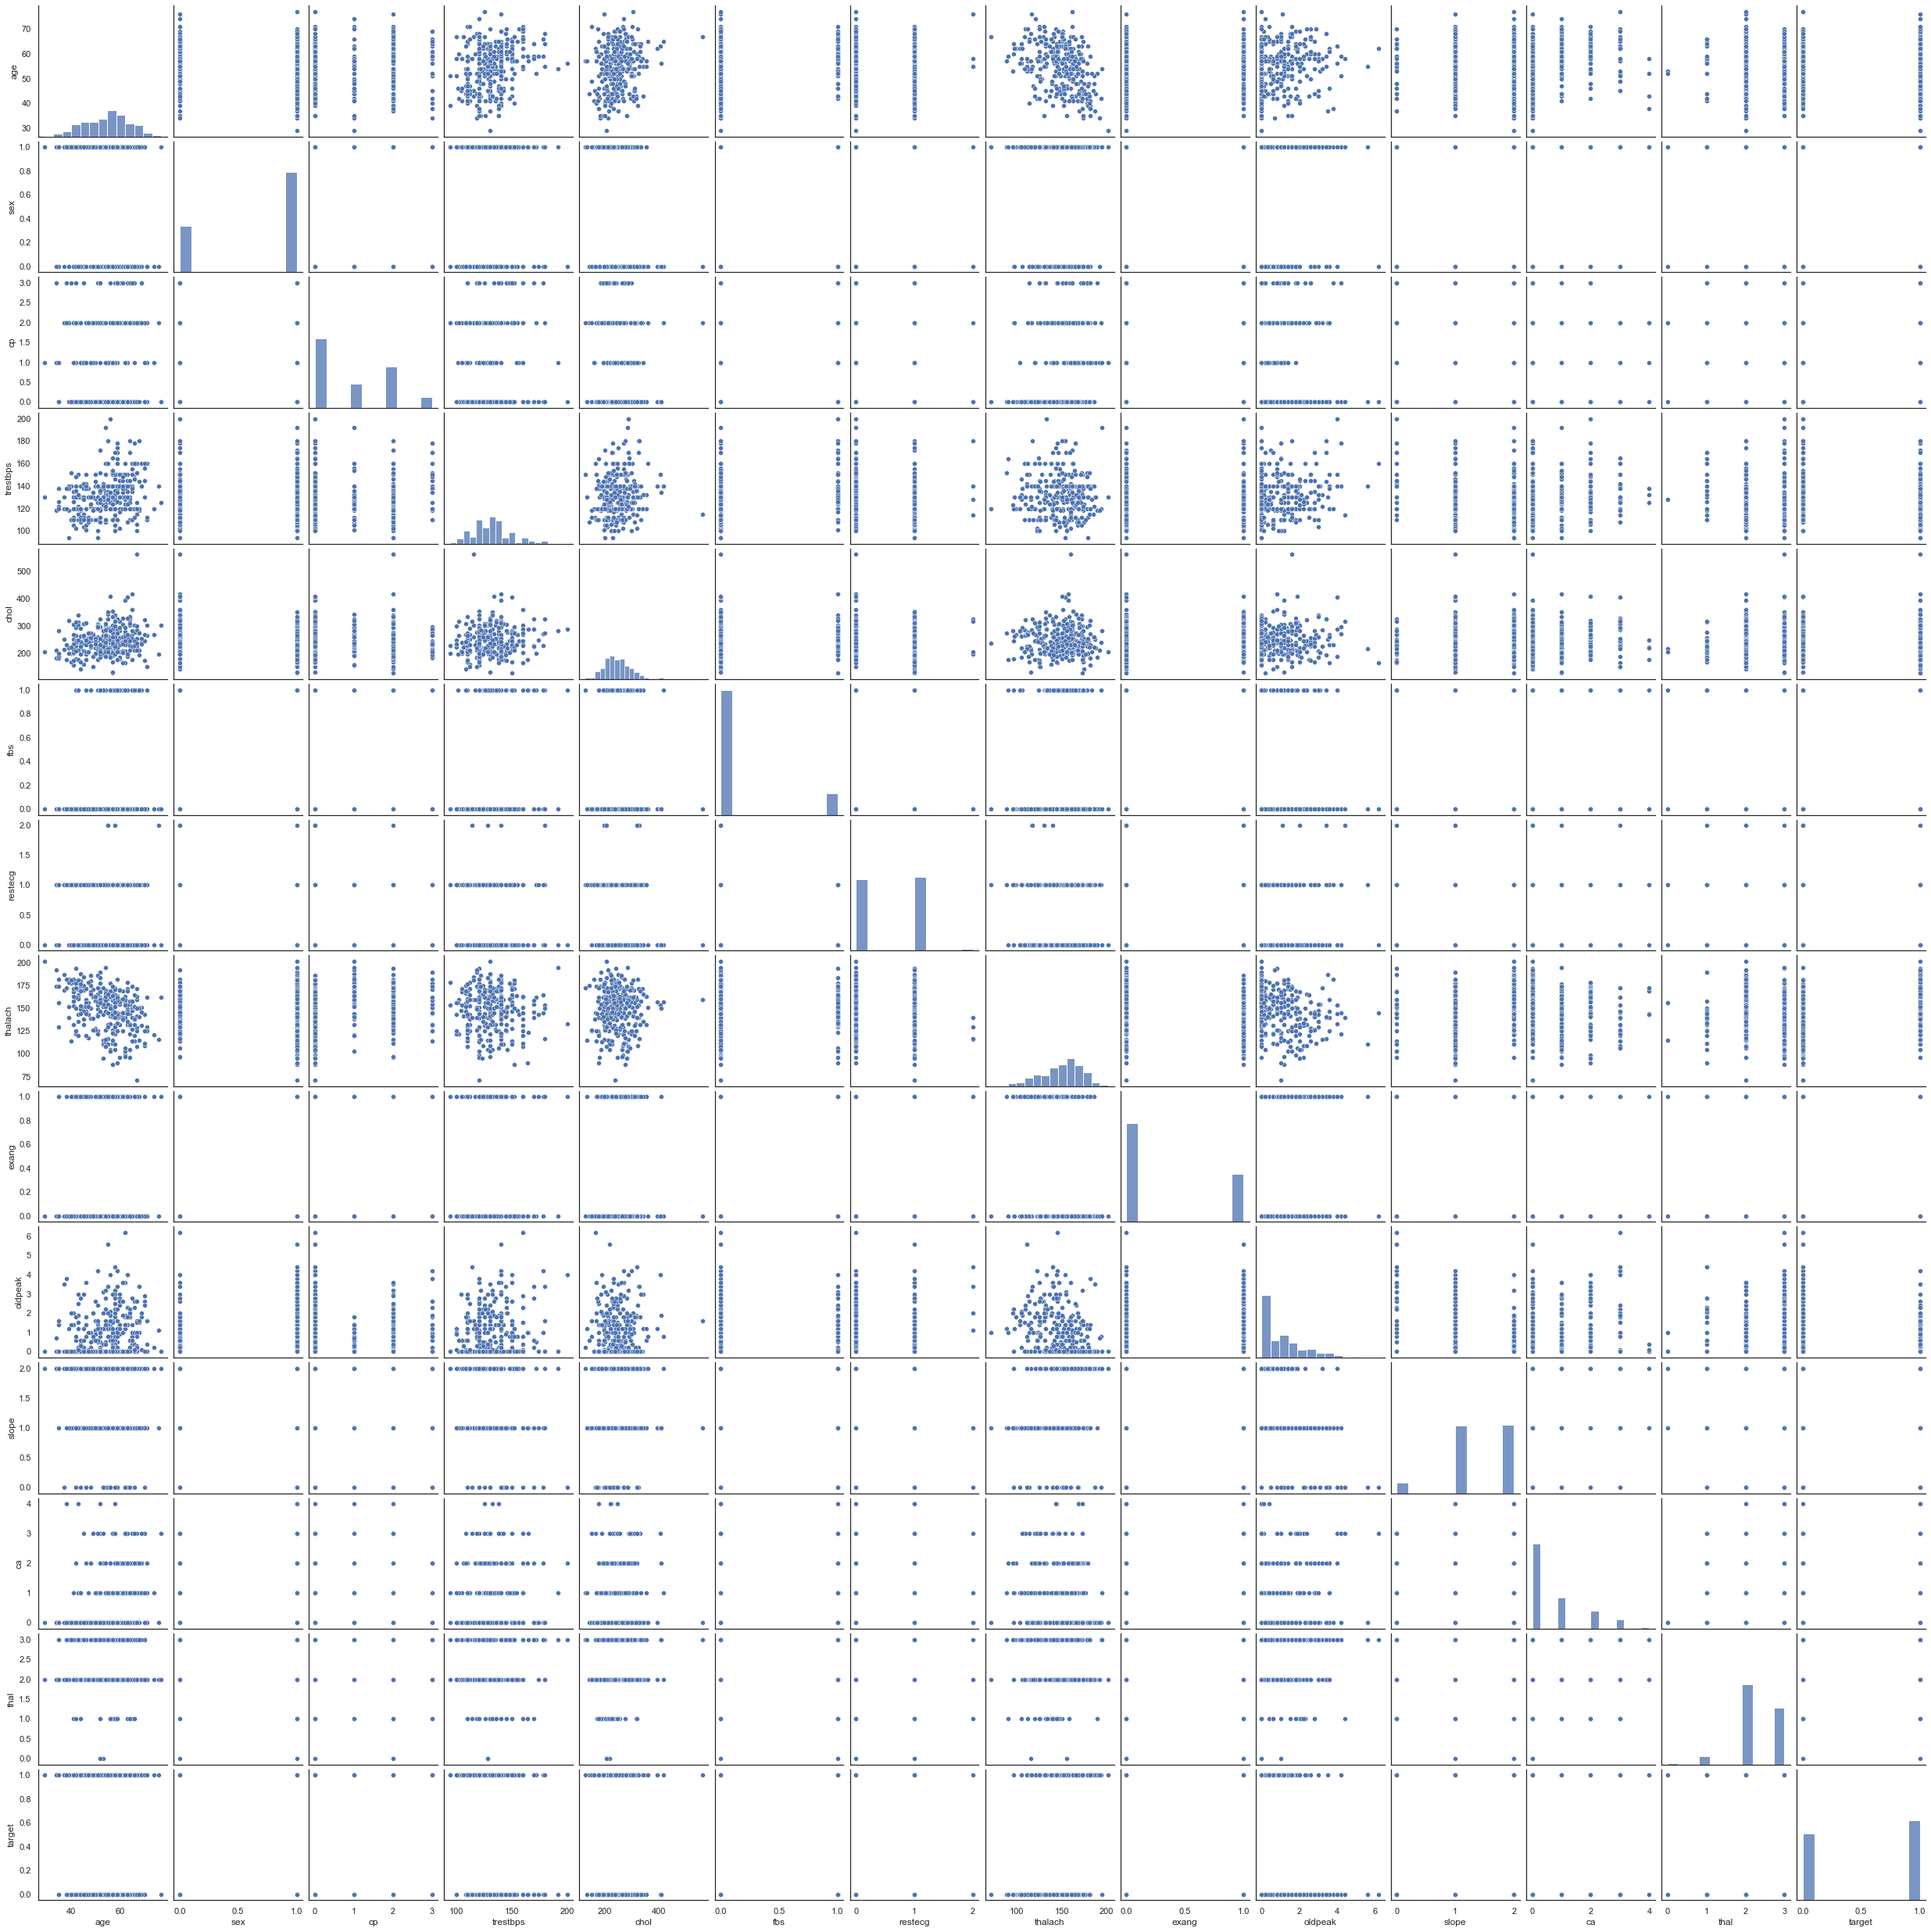

In [36]:
#Using pairplot from seaborn library
sb.pairplot(cvd_data)

In [37]:
 #Building and predicting the model and its accuracy respectively using␣ 􏰀→Logisting regression
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [38]:
df_train, df_test = train_test_split(cvd_data, test_size=0.20, random_state=20)

In [39]:
display(df_train.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [40]:
display(df_test.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [41]:
display(df_train.shape)
display(df_test.shape)

(241, 14)

(61, 14)

In [42]:
X_train = cvd_data.drop("target", axis=1)
y_train = cvd_data.target

In [43]:
X_test =df_test
y_test = df_test.pop("target")

In [44]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(302, 13)

(302,)

(61, 13)

(61,)

In [45]:
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)
print(X_train.columns)

[0.03297418]
[[ 0.01521137 -1.23814223  0.79192357 -0.01764186 -0.00281549 -0.05641067
   0.49478926  0.0319134  -0.74411622 -0.49902818  0.48668416 -0.76867326
  -0.90616076]]
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [46]:
y_pred= model.predict(X_test)

In [47]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,y_pred)
print ("Logistic testing accuracy is ", round(accuracy,2) * 100, "%")

Logistic testing accuracy is  90.0 %


# Insight
Accuracy of the model is very high which means it is predicting the data very well.

In [52]:
#Validating the results by using the confusion matrix and classification␣ 􏰀→report(Providing better understanding of the results)
from sklearn.metrics import confusion_matrix, classification_report 
confusion_matrix(y_test,y_pred)

array([[20,  3],
       [ 3, 35]])

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.92      0.92      0.92        38

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Insight
From both confusion matrix and classification report it is clear that model is very good in predicting the data. Sensitivity and specificity is also very good as per the industry standards.